In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

NDIR = 'normal'
HDIR = 'haptic'
TIMESTEP = 0.02

In [15]:
normalFiles = os.listdir(NDIR)
hapticFiles = os.listdir(HDIR)

In [16]:
df = pd.read_csv(os.path.join(NDIR, normalFiles[0]))

In [28]:
distances = df.iloc[:, 0].values
points = np.linspace(0, len(distances) * TIMESTEP, len(distances))

In [29]:
distances

array([5.697158 , 5.70373  , 5.706279 , ..., 0.9311351, 0.9311395,
       0.9311426], shape=(1806,))

In [30]:
points

array([0.00000000e+00, 2.00110803e-02, 4.00221607e-02, ...,
       3.60799778e+01, 3.60999889e+01, 3.61200000e+01], shape=(1806,))

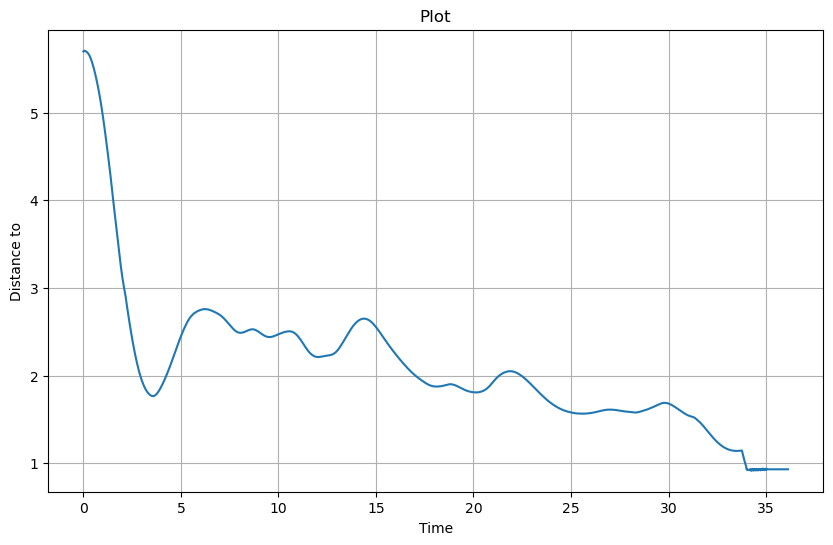

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(points, distances)
plt.xlabel("Time")
plt.ylabel("Distance to")
plt.title('Plot')
plt.grid(True)
plt.show()

In [38]:
def plot_csv(files, column = 0, name = "Marker Distance"):
    plt.figure(figsize=(10, 6))
    plt.xlabel("Time (s)")
    plt.ylabel(name)
    plt.title('Plot')
    plt.grid(True)

    for fn in files:
        df = pd.read_csv(fn)
        distances = df.iloc[:, column].values
        points = np.linspace(0, len(distances) * TIMESTEP, len(distances))
        plt.plot(points, distances)
    
    plt.show()

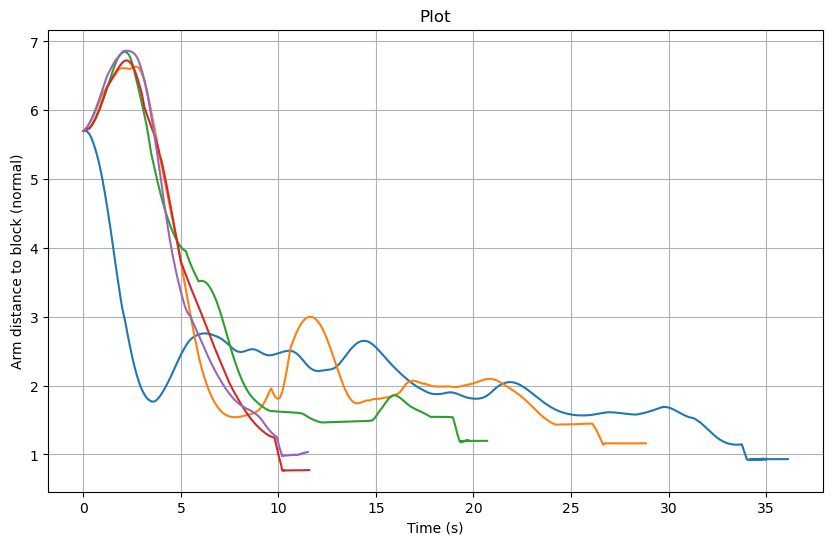

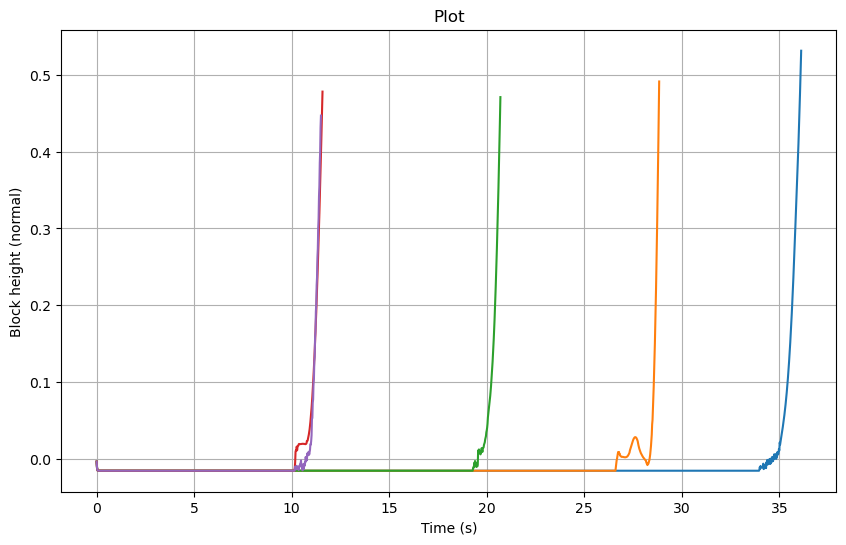

In [49]:
plot_csv([os.path.join(NDIR, x
plt.figure(figsize=(10, 6))
plt.plot(points, distances)
plt.xlabel("Time")
plt.ylabel("Distance to")
plt.title('Plot')
plt.grid(True)
plt.show()
def plot_csv(files, column = 0, name = "Marker Distance"):
    plt.figure(figsize=(10, 6))
    plt.xlabel("Time (s)")
    plt.ylabel(name)
    plt.title('Plot')
    plt.grid(True)

    for fn in files:
        df = pd.read_csv(fn)
        distances = df.iloc[:, column].values
        points = np.linspace(0, len(distances) * TIMESTEP, len(distances))
        plt.plot(points, distances)
    
    plt.show()
Selection deleted
plot_csv([os.path.join(NDIR, x) for x in normalFiles], name = "Arm distance to block (normal)")
plot_csv([os.path.join(NDIR, x) for x in normalFiles], column = 1, name = "Block height (normal)")
# Haptic now
Selection deleted
plot_csv([os.path.join(HDIR, x) for x in hapticFiles], name = "Arm Distance to block (haptic)")
plot_csv([os.path.join(HDIR, x) for x in hapticFiles], column = 1, name = "Block height (haptic)")

1
Python 3 (ipykernel) | Idle
) for x in normalFiles], name = "Arm distance to block (normal)")
plot_csv([os.path.join(NDIR, x) for x in normalFiles], column = 1, name = "Block height (normal)")

In [50]:
# Haptic now

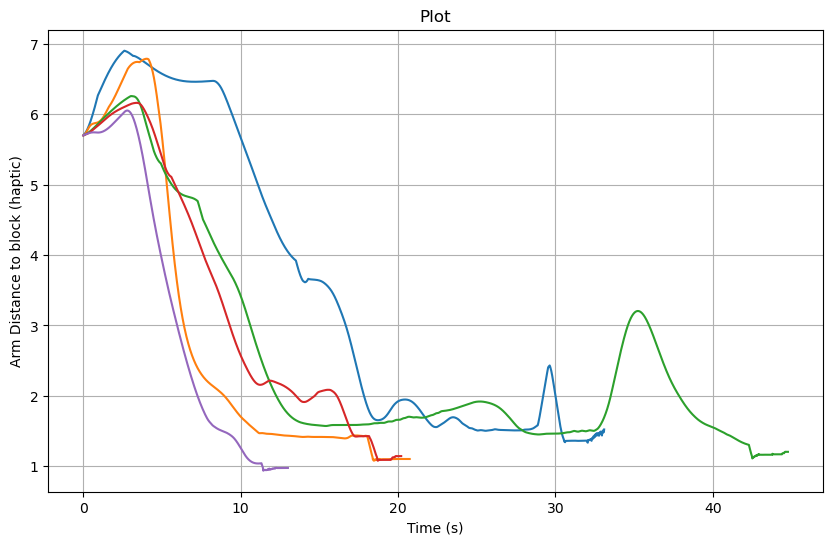

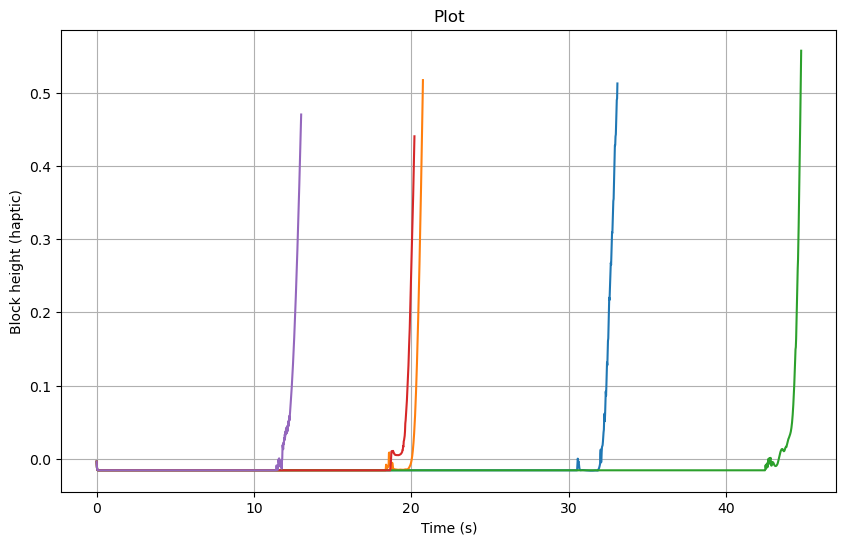

In [51]:
plot_csv([os.path.join(HDIR, x) for x in hapticFiles], name = "Arm Distance to block (haptic)")
plot_csv([os.path.join(HDIR, x) for x in hapticFiles], column = 1, name = "Block height (haptic)")